# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

We need to dummify all the non-floar variables. So species, island, sex, year.

In [4]:
!pip install palmerpenguins

In [5]:
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import ggplot, aes, geom_point, geom_bar,scale_y_continuous
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [69]:
myData = load_penguins()
myData.head()
myData = myData.dropna()
x = myData.drop(['bill_length_mm'], axis=1)
y = myData['bill_length_mm']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

,species,island,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
190,Gentoo,Biscoe,13.6,208.0,4350.0,female,2008
107,Adelie,Biscoe,20.0,190.0,3900.0,male,2009
121,Adelie,Torgersen,19.8,198.0,3500.0,male,2009
196,Gentoo,Biscoe,15.9,222.0,5550.0,male,2008
304,Chinstrap,Dream,17.8,191.0,3700.0,female,2008
...,...,...,...,...,...,...,...
129,Adelie,Torgersen,18.0,210.0,4000.0,male,2009
277,Chinstrap,Dream,19.5,196.0,3900.0,male,2007
0,Adelie,Torgersen,18.7,181.0,3750.0,male,2007
93,Adelie,Dream,18.1,186.0,4450.0,male,2008


In [30]:
## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

# [('scaler', StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)

In [31]:
enc.fit_transform(myData[['species']])

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

In [32]:
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [37]:
y_preds = fitted_pipeline.predict(x_test)

In [39]:
r2 = r2_score(y_test, y_preds)
r2

0.7887183549624717

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

Linear

In [70]:
x = myData[['bill_length_mm']]
y = myData['bill_depth_mm']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

,bill_length_mm
266,46.2
196,50.5
258,41.7
68,35.9
52,35.0
...,...
267,55.1
132,36.8
67,41.1
303,49.5


In [72]:
## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()


# [('scaler', StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('ols', lr)]
)

In [73]:
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_preds = fitted_pipeline.predict(x_test)

In [74]:
x_test['y_test']=y_test
x_test['y_preds']=y_preds

2 degree

In [75]:
#2 degree
lr = LinearRegression()
ct = ColumnTransformer([('2 degree', PolynomialFeatures(degree = 2, include_bias = False), ['bill_length_mm'])])


my_pipeline = Pipeline(
    [('2 degree',ct),('ols', lr)]
)

In [76]:
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_twodegree = fitted_pipeline.predict(x_test)

3 degree

In [77]:
#3 degree
lr = LinearRegression()
ct = ColumnTransformer([('3 degree', PolynomialFeatures(degree = 3, include_bias = False), ['bill_length_mm'])])


my_pipeline = Pipeline(
    [('3 degree',ct),('ols', lr)]
)
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_threedegree = fitted_pipeline.predict(x_test)

In [78]:
#10 degree
lr = LinearRegression()
ct = ColumnTransformer([('10 degree', PolynomialFeatures(degree = 10, include_bias = False), ['bill_length_mm'])])


my_pipeline = Pipeline(
    [('10 degree',ct),('ols', lr)]
)
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_tendegree = fitted_pipeline.predict(x_test)

In [79]:
x_test['y_tendegree']=y_tendegree
x_test['y_threedegree']=y_threedegree
x_test['y_twodegree']=y_twodegree
x_test['y_preds']=y_preds

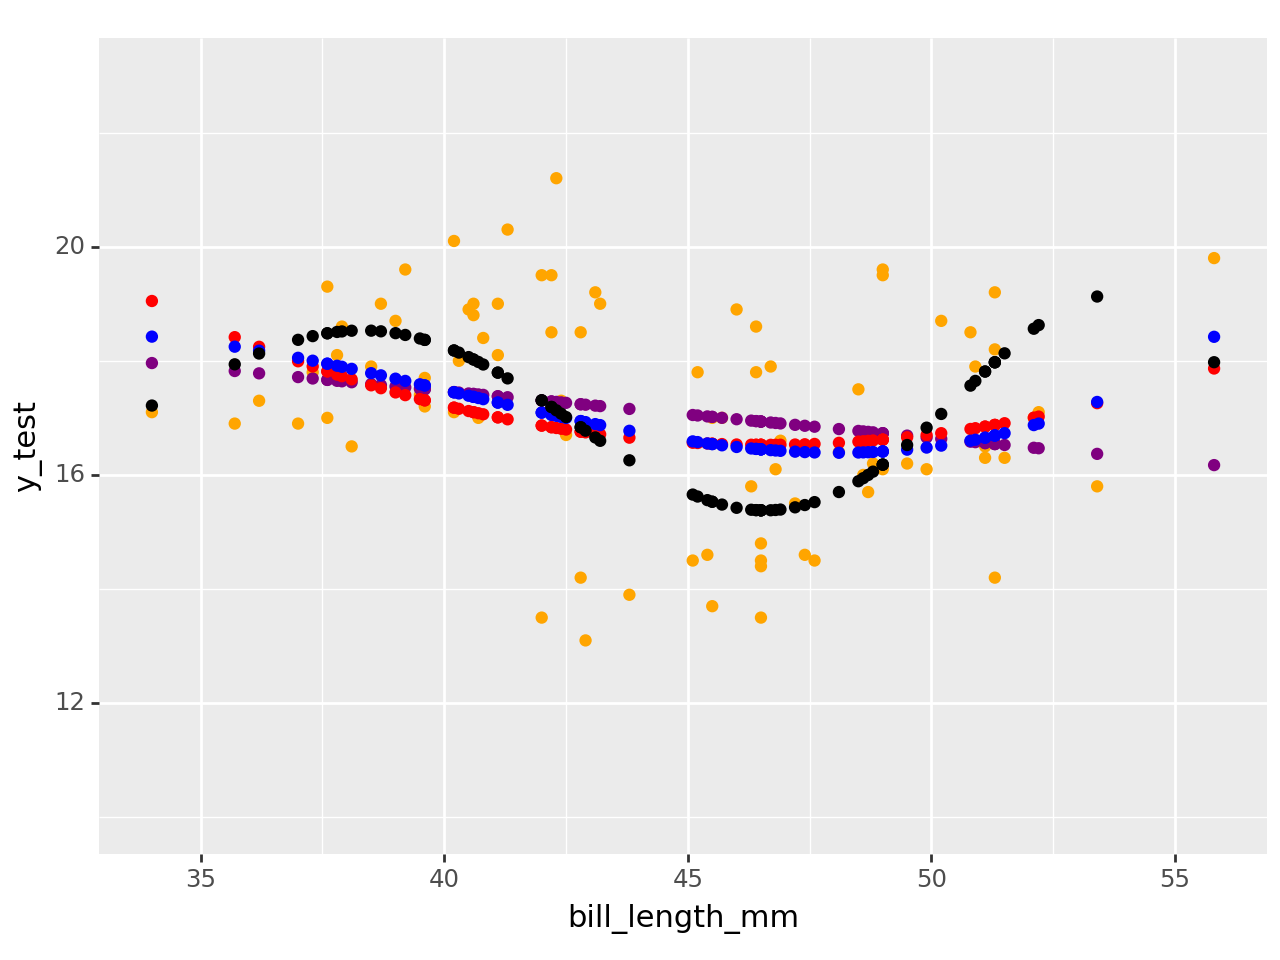

<Figure Size: (640 x 480)>

In [80]:

p = (ggplot(x_test, aes(x='bill_length_mm')) +
     geom_point(aes(y='y_test'), color='orange') +
     geom_point(aes(y='y_preds'), color='purple') +
     geom_point(aes(y='y_twodegree'), color='red') +
     geom_point(aes(y='y_threedegree'), color='blue') +
     geom_point(aes(y='y_tendegree'), color='black') )


p + scale_y_continuous(limits=[10, 23])


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

It seems like the model with ten degree is slightly overfitting the data most because it fits the actual data the most. The linear model is probably underfitting, as it's essentially a straight line while in reality the data is no where close to a linear trend. I think the one with ten degree fits the most as it closely follows the trend of the data. In addition, it has the least rmse.


In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
rmse1 = np.sqrt(mse)
rmse1

1.7730182128773733

In [85]:
mse = mean_squared_error(y_test, y_twodegree)
rmse2 = np.sqrt(mse)
rmse2

1.7580369820023374

In [86]:
mse = mean_squared_error(y_test, y_tendegree)
rmse3 = np.sqrt(mse)
rmse3

1.7196993232749667